# Exercise session 7: Analysis of high-dimensional data

In this notebook you will be presented with:
1. Geometric view of data and two types of dimensionality reduction methods
2. Choose the right level of description and the right method to distinguish between different implementations of the same function
3. Analysis of high-dimensional representations in Alexnet

In [1]:
from utils_ex7.single_units_ctx_utils import *
from utils_ex7.intro_geometric_view_utils import *

## Part I. Geometric view of data 

In the first part of this notebook we will explore how multivariate data can be represented in different orthonormal bases. We will introduce two methods for determining orthonormal bases <ins>PCA (Principal Component Analysis)</ins> and   <ins>TDR (Targeted Dimensionality Reduction)</ins>.


Imagine we have samples that represent the activity (firing rates) of two recorded neurons on different trials. Each point in the scatter plot is the activity on a trial. Trials can be grouped by the motor ouput of the subject (blue for choice 1 and red for choice 2) and by the strength of the sensory input (color coded by color intensity - dark red/blue for strong input and light red/blue for weak input).

The mean of each choice is fixed, but you can change the covariance matrix within each choice by adjusting the slider “Corr Coeff“. 

You should get a feel for how changing the correlation coefficient affects the geometry of the simulated data.

In [2]:
iplot_data()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Corr Coeff', max=1.0, min=-…

**Assignment 1** What effect do negative correlation coefficient values have?

**Assignment 2** What correlation coefficient results in a circular data cloud?

As you saw in Lecture 6 and 7, as we go deeper into the brain, responses of single neurons appear to represent several different signals at once. Therefore, it is more common nowadays to analyse the responses of the population as a whole. The activity of the recorded units is then represented in a high-dimensional space, where the number of neurons determines the dimensionality (if you record from 200 units then the dimensionality is 200). 

To study how the population as a whole encodes task variables (motor output, sensory input) we represent population responses as trajectories in neural state space.  Each point
in state space corresponds to a unique pattern of neural activations
across the population.

When we analyze high-dimensional neural data we focus on a low-dimensional subspace. In this part of the tutorial we will introduce two dimensionality reduction methods.
1. Principal Component Analysis is a technique used to reduce the dimensionality of data by transforming it into a new coordinate system, where the largest variance by any projection of the data lies on the first axis (called the first principal component), the second largest variance on the second axis, and so on. 
2. Targeted dimensionality reduction focuses on reducing data dimensions in a way that aligns with specific features or variables of interest, rather than maximizing overall variance as in PCA. 

We describe the response of unit i at time t as a linear combination of several task variables:


\begin{align*}
  r_{i,t}(k) = \beta_{i,t}(1) \mathrm{choice}(k) + \beta_{i,t}(2) \mathrm{input_{strength}}(k)\\
\end{align*}

The regression coefficients describe how much the trial-by-trial firing rate of unit $i$ depends on the corresponding task variable $v=1,2$. We use these regression coefficients to identify dimensions in state space containing task related variance. 

For each task variable v = 1,2 we first build a set of coefficient vectors $\beta_{v,t}$ whose entries $\beta_{i,t}(i)$ correspond to the regression coefficient for task variable $v$, time $t$ and unit $i$. Each vector $\beta_{v,t}$ corresponds to a direction in state space that accounts for variance in the population response at time $t$, due to variation in task variable $v$.

Finally we obtain orthogonal axes of choice and input strength by orthogonalizing the regression vectors with QR-decomposition. The resulting axes span the same 'regression subspace' as the original regression vectors, but crucially each explains distinct portions of the variance in the responses.

**Assignment 3** Which method is better when corr-coeff is negative? What about when corr-coeff is positive?

**Assignment 4** What is the effect of orthogonalization order (input strength first vs. choice first) on the identified task relevant subspace? 

In [3]:
iplot_data_2classes()

# Context-dependent models

In the second part of this notebook we will give you 4 datasets. What these datasets have in common is that they all achieve the same function, but through different implementations. Your task will be to distinguish the different implementations by choosing the right level of description: single-unit or population-level response and by  applying the methods introduced in the previous section: PCA, TDR, order of orthogonalization. 

<ins>The behavioral task:</ins> All 4 datasets implement selective integration. On each trial, two inputs are presented, a motion input and a color input, of different strengths. Depending on the context, motion context or color context, the subject needs to integration the relevant input (motion input in motion context and color input in color context) and ignore the irrelevant input (motion input in color context and color input in motion context). 

The motion input has two directions. On correct trials, motion to the right is associated with a choice to the right (choice 1) and motion to the left is associated with a choice to the left (choice 2). Similarly, the color input has two directions. On correct trials, red is associated with a choice to the right (choice 1) and green is associated with a choice to the left (choice 2). We will only analyze correct trials. Each input has 3 different strengths (weak 5, medium 15, strong 50) for each choice (-50, -15, -5 for choice 2 and 50, 15, 5 for choice 1).

In the figure below you can see the task might look like (a) and the stimulus set (b).

**Assignment 5** How can you interpret the psychophysical curves in c-f? Why are c & d different? Why are c & f similar?

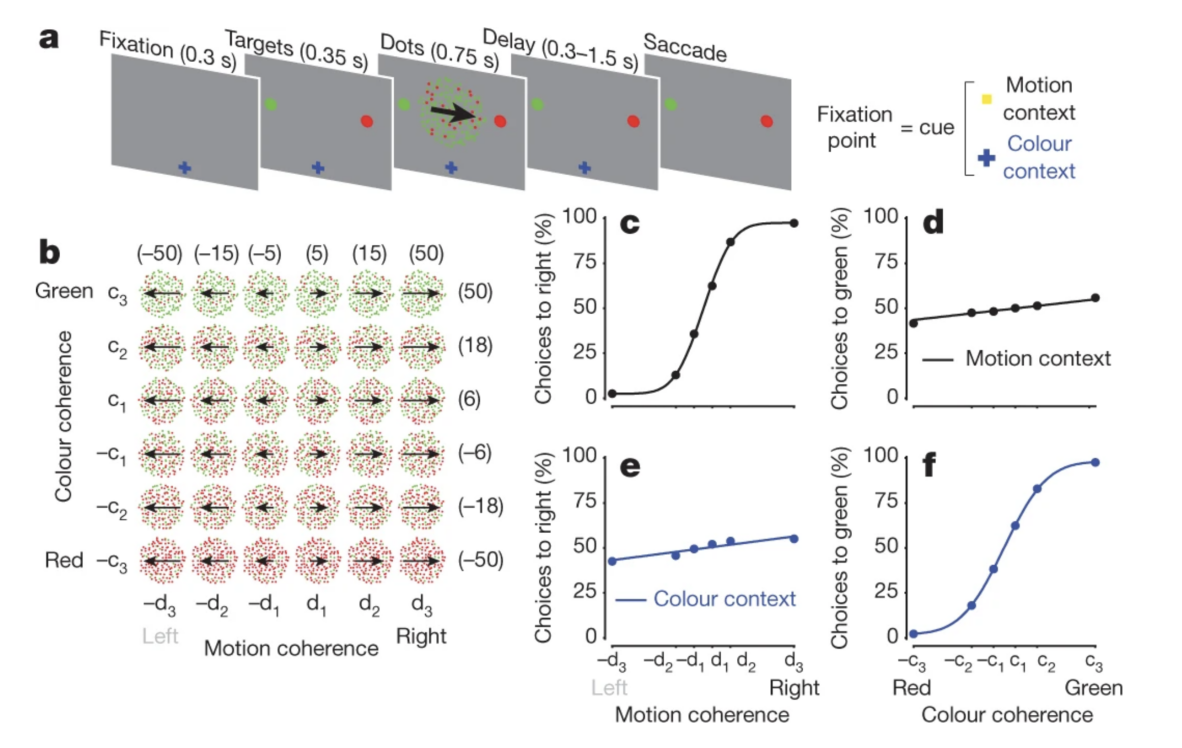

In [4]:
show_task()

The 4 datasets differ with respect to the relative directions and context dependence of the choice axis (red lines) and the inputs (black and blue lines).

<ins>Model 1: Early selection.</ins> When relevant, the motion input pushes the population response along the choice axis. When irrelevant, the motion input is filtered out before and thus exerts not effect on choice. Motion input is aligned with choice in motion context (top row, left panel) and color input is aligned with choice in color context (bottom row, right panel). Color input is not present in motion context (top row, right panel - no blue line) and motion input is not present in color context (bottom row, left panel - no black line).

<ins>Model 2: Context-dependent input direction.</ins> Motion input direction varies between contexts, whereas the choice axis is stable (red line is consistent across both contexts - top and bottom row). Inputs are selected based on the basis of their projection onto the choice axis. Motion input is aligned with choice axis in motion context (top row, left panel) and color input is aligned with choice axis in color context (bottom row, right panel). Motion input is orthogonal to choice axis in color context (bottom row, left panel) and color input is orthogonal to choice axis in motion context (top row, right panel). Motion axis (black line) is different between motion context and color context (left panel, top and bottom row) and similarly, color axis (blue line) is different between the two contexts.


<ins>Model 3: Context-dependent output direction.</ins> Choice axis varies between contexts, whereas motion input direction is stable (blue/black lines have same direction in the two context, top and bottom row). Inputs are selected based on the basis of their projection onto the choice axis. Motion input is aligned with choice axis in motion context (top row, left panel) and color input is aligned with choice axis in color context (bottom row, right panel). Choice axis is different between the two contexts (in motion context the red axis is horizontal, top row and in color context the red axis is vertical, bottom row).

<ins>Model 4: Context-dependent selective integration.</ins> All axes (motion, color and choice) are stable across contexts. The same input (motion) leads to integration in motion context, but is ignored in the color context. This can be achieved if inputs are selected by a selection vector.

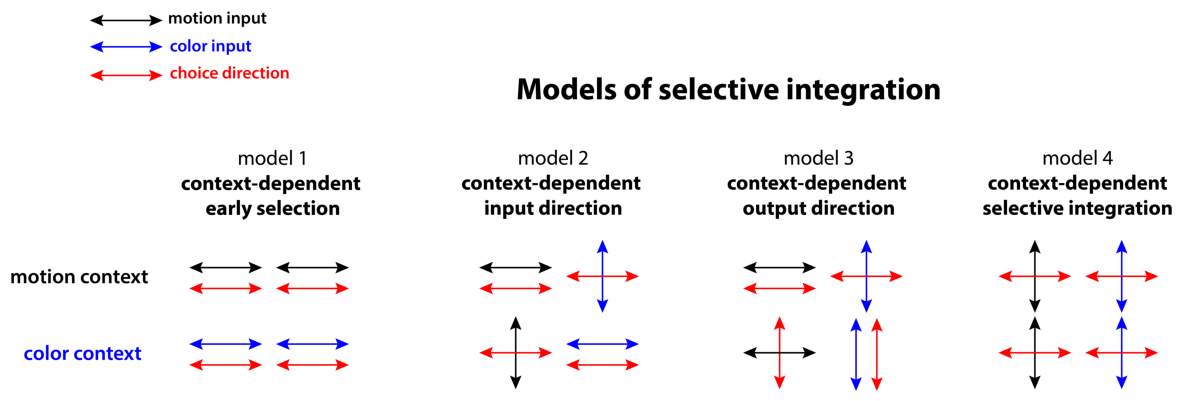

In [5]:
show_models_geometry()

Load the datasets:

In [6]:
# Run without changing
model_a = load_context_dependent_models('model_a')
model_b = load_context_dependent_models('model_b')
model_c = load_context_dependent_models('model_c')
model_d = load_context_dependent_models('model_d')


## Single unit analysis 

<ins>The neural data:</ins> You have the activity of 500 units recording during input presentation. For the rest of the notebook we will look at condition-averages, where we group trials according to certain conditions and observe the averaged activity.

Below you can visualize condition-averages. Each time you run the cell below, you will see the condition-averaged activity of 6 randomly selected neurons. 
- In the first row, trials are sorted by choice (continuous line for choice 1 vs dashed line for choice 2 across all trials). 
- In the second row, trials are sorted by the strength of motion input (weak in light grey to strong in black) and choice (same continuous vs dashed line as above) and only trials for motion context are considered. 
- In the third row, the same split of data but now for color input and color context. 
- In the fourth row, trials are sorted by context (motion in black and color in blue) and choice (same continuous vs. dashed line) for all trials.

**Assignment 6** Plot condition averaged (PSTHs) from all four models. Can you identify some PSTHs that are specific to a model? What about PSTHs that are common across models?

**** Sort by choice (all trials) ****


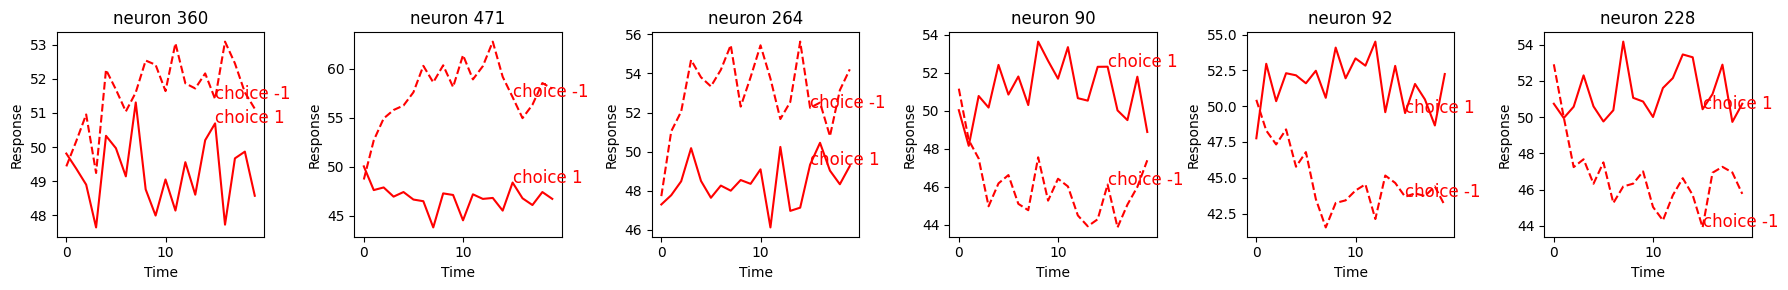

**** Sort by motion and choice (motion context) ****


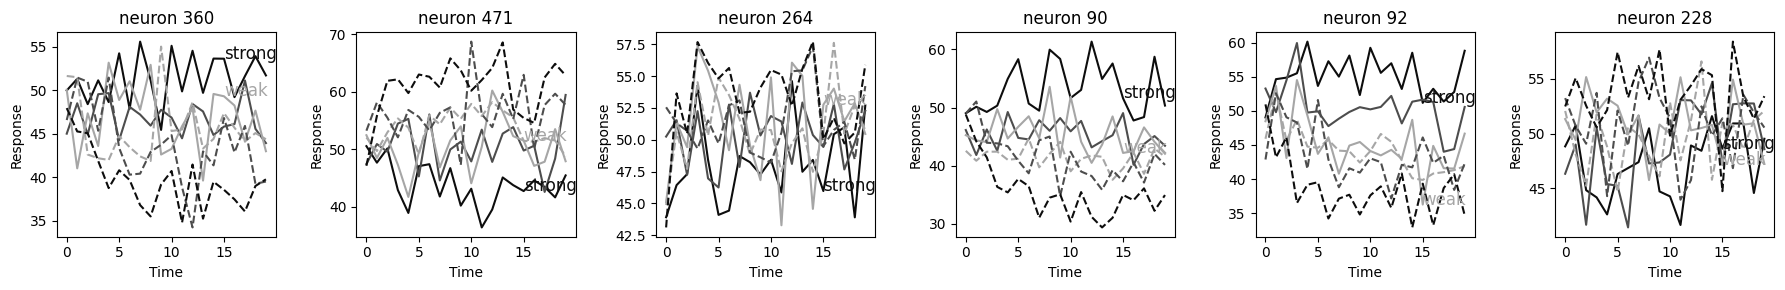

**** Sort by color and choice (color context) ****


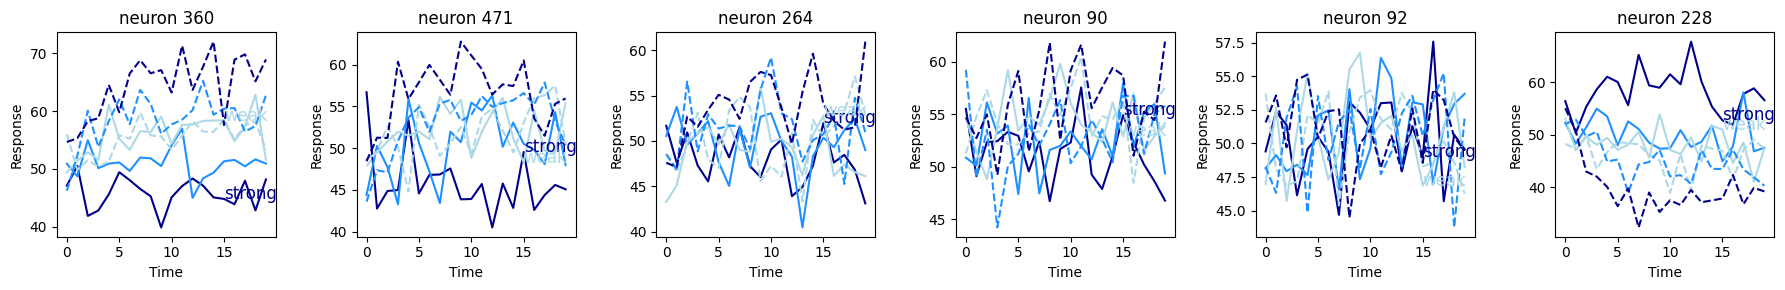

**** Sort by context and choice (all trials) ****


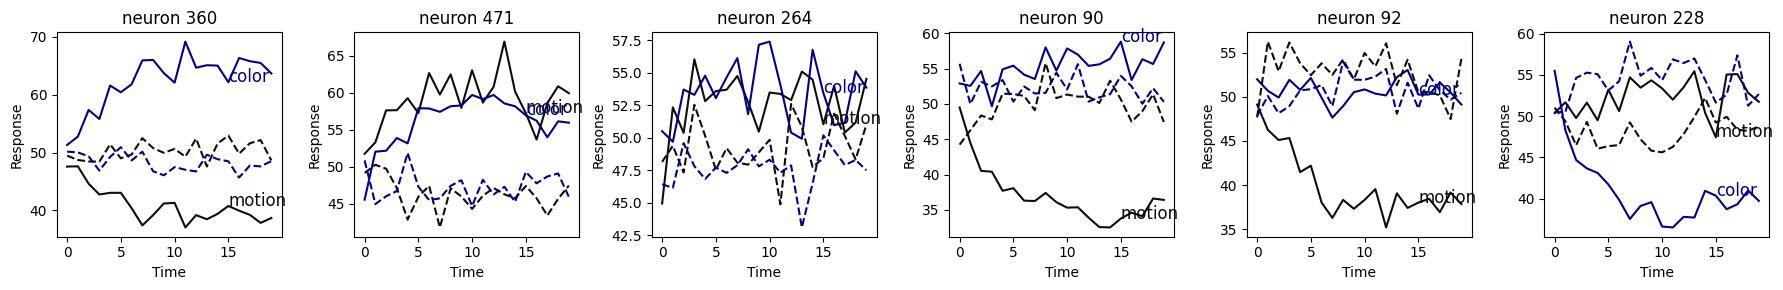

In [7]:
plot_psths(model_a)

### Encoding models

How to determine if a neuron is selective to a behavioral variable?

We use multi-variable linear regression to determine how various task variables affect the responses of each unit. 
\begin{align*}
  r_{i,t}(k) = \beta_{i,t}(1) \mathrm{choice}(k) + \beta_{i,t}(2) \mathrm{motion_{strength}}(k) + \beta_{i,t}(3) \mathrm{color_{strength}}(k) + \beta_{i,t}(4) \mathrm{context}(k)\\
\end{align*}

In the top row of the figure below, we plot the regression coefficients estimated with the equation above against each other. Each point is a neuron. Notably, we estimate these regression coefficients from all trials. Moreover, as seen in the equation above, we estimate a set of regression coefficients at each time, but in the plots below we will only focus on one time point. The time point we chose is the one where the ...

In the bottom row, we estimate the regression coefficients for each context separately, i.e. we will estimate $\beta_{i,t}(1)$ for choice, $\beta_{i,t}(2)$ for motion input and $\beta_{i,t}(3)$ for color input separately for motion context, resulting in choice(motion), motion(motion) and color(motion). Similary, we estimate them for the color context and obtain choice(color), motion(color) and color(color).

**Assignment 7** What means a positive $\beta_{i,t}$? What about a negative $\beta_{i,t}$?

**Assignment 8** What is the difference between $\beta_{i,t}$ = 0.5 and $\beta_{i,t}$ = 4?

**Assignment 9** What does it mean when $\beta_{i,t}(1)$ (for choice) vs $\beta_{i,t}(2)$ (for motion) is a circular data cloud? What about when it is an ellipse? 

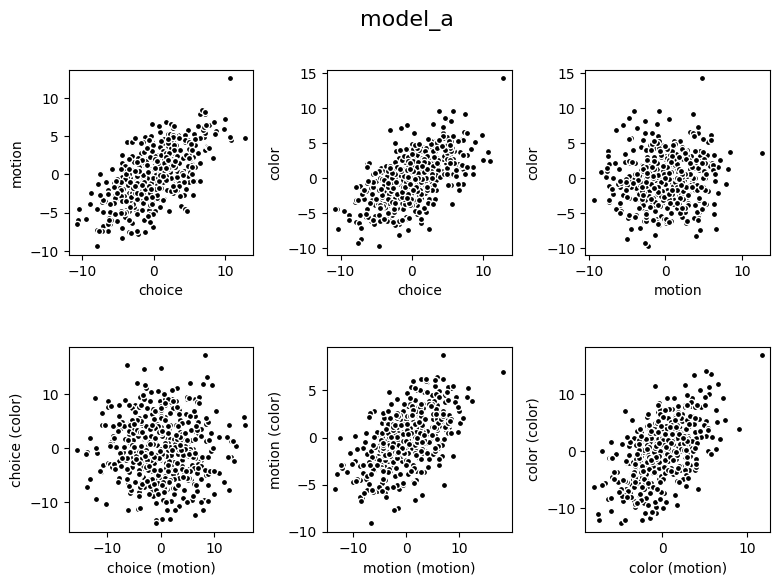

In [8]:
plot_tunings(model_a)
#plot_tunings(model_b)
#plot_tunings(model_c)
#plot_tunings(model_d)

**Assignment 10** Do any of the models have $\beta_{i,t}(1)$ (for choice in color context) vs $\beta_{i,t}(1)$ (for choice in motion context) as a circular data cloud? What does this mean for the choice axis?

**Assignment 11** Summarizing the Single-unit analysis part. Can you distinguish between the models by looking at the single unit properties? If not completely, can you at least rule out some associations, for e.g. make statements of the type 'model_a is definitely model 1'?

## Population-level analysis

Next we will study the population as a whole. We will reduce the dimensionality of the dataset from 500 dimensions to 4 dimensions with PCA and 3 dimensions with TDR. Both these two methods were introduced in the first part of the notebook.

In TDR we can investigate whether the chosen task variables are represented in the neural population by computing a time-dependent Frobenius norm.

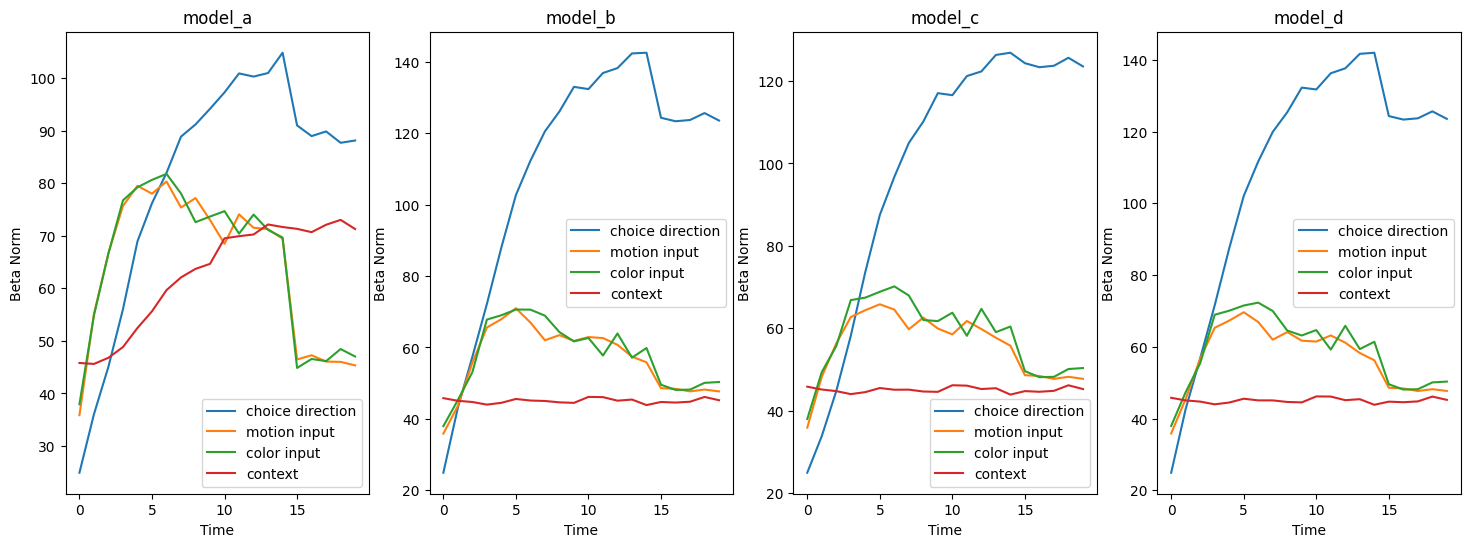

In [9]:
# Run without changing

plot_beta_norm(model_a, model_b, model_c, model_d)

In PCA we can look at variance explained by each PC.

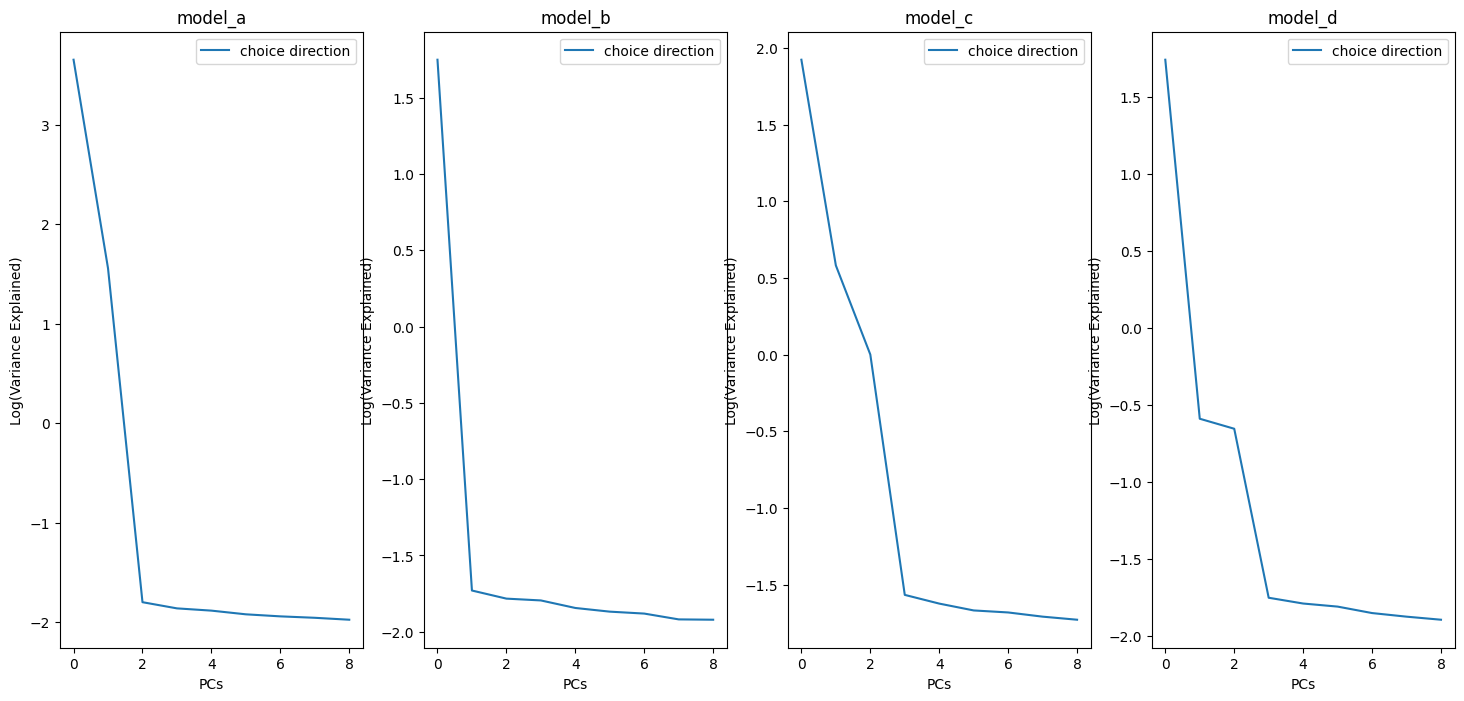

In [10]:
# Run without changing

plot_pca_var_explained(model_a, model_b, model_c, model_d)

### 1-d Projections

Relevant input: motion input in motion context or color input in color context
- 6 conditions (-50, -15, -5 for choice 2 and +50, +15, +5 for choice 1)

Irrelevant input: motion input in color context or color input in motion context
- 12 conditions (-50, -15, -5, 5, 15, 50 for choice 1 and -50, -15, -5, 5, 15, 50 for choice 2)


Filled circles represent choice 1 and open circles represent choice 2. The color-intensity represents the input strength (black, grey, light grey for strong, medium, weak motion input respectively and dark blue, medium blue, light blue for strong, medium, weak color input).



Below you can use PCA or TDR to visualize 1-d trajectories. The y-axis illustrates the projection value and the x-axis illustrates time.

For PCA you can run: plot_projections_1d(model_a, 'pca') and select the model: model_a, model_b, model_c, model_d

For TDR you can run: plot_projections_1d(model_a, 'tdr', ['input_motion','input_color', 'choice']). The last argument determines the order of orthogonalization. You can choose between:

['input_motion', 'choice', 'input_color']

['choice', 'input_motion', 'input_color']

['input_motion','input_color', 'choice']



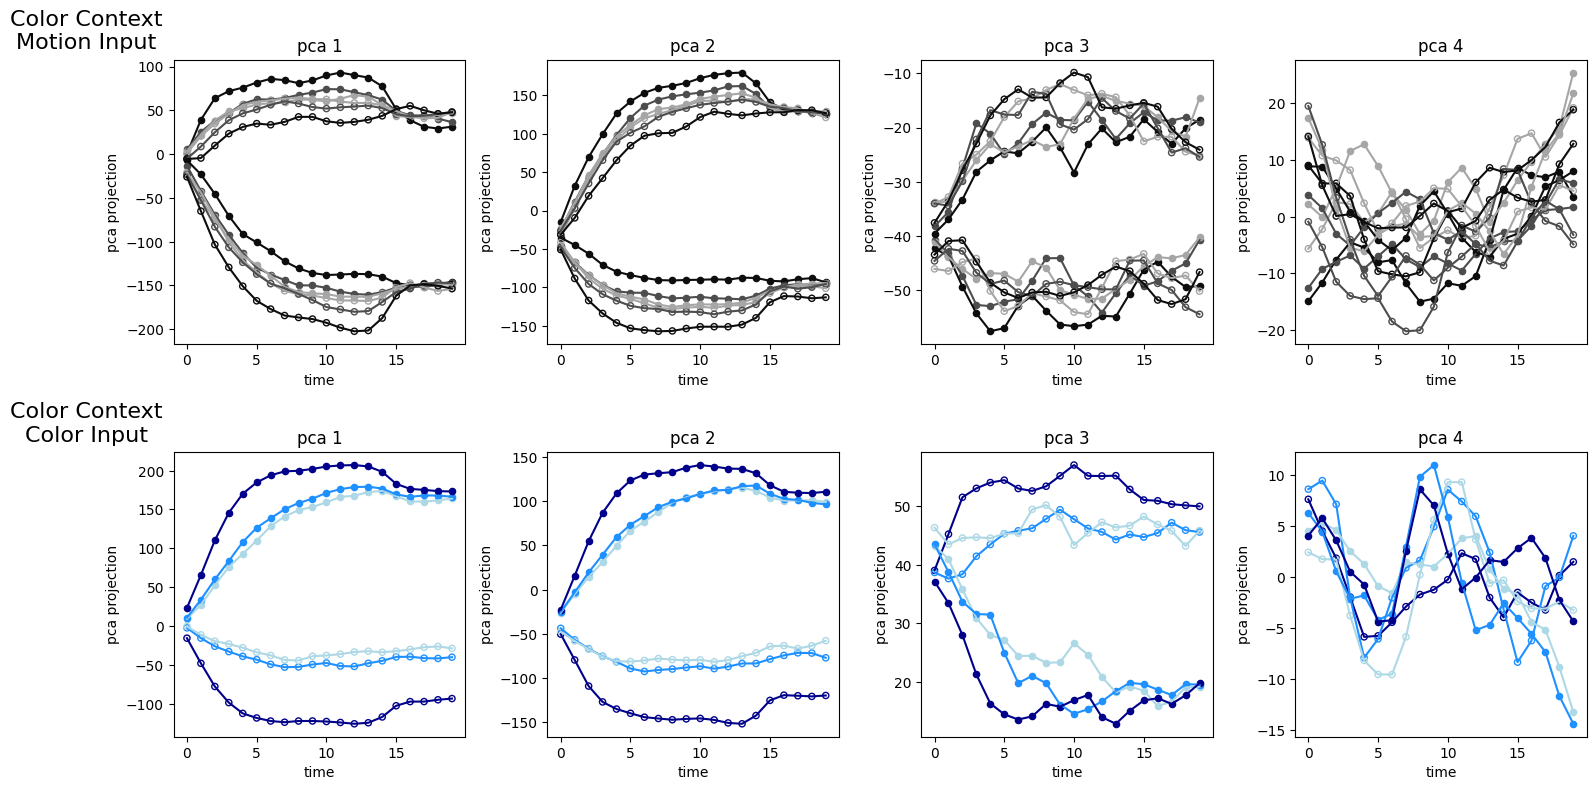

In [11]:
# Here you can select the method (pca or tdr), the context (motion or color) and the order of orthogonalization (relevant only for tdr). We provide example for the different ways to run it below:


context = 'color'
#context = 'motion'


order_orthogonalization = ['input_motion', 'choice', 'input_color']
#order_orthogonalization = ['choice', 'input_motion', 'input_color']
#order_orthogonalization = ['input_motion',  'input_color', 'choice']

plot_projections_1d(model_a, 'pca', [], context)
#plot_projections_1d(model_a, 'tdr', order_orthogonalization, context)


## 2-d Projections

Same conditions as for 1-d projections.


### PCA

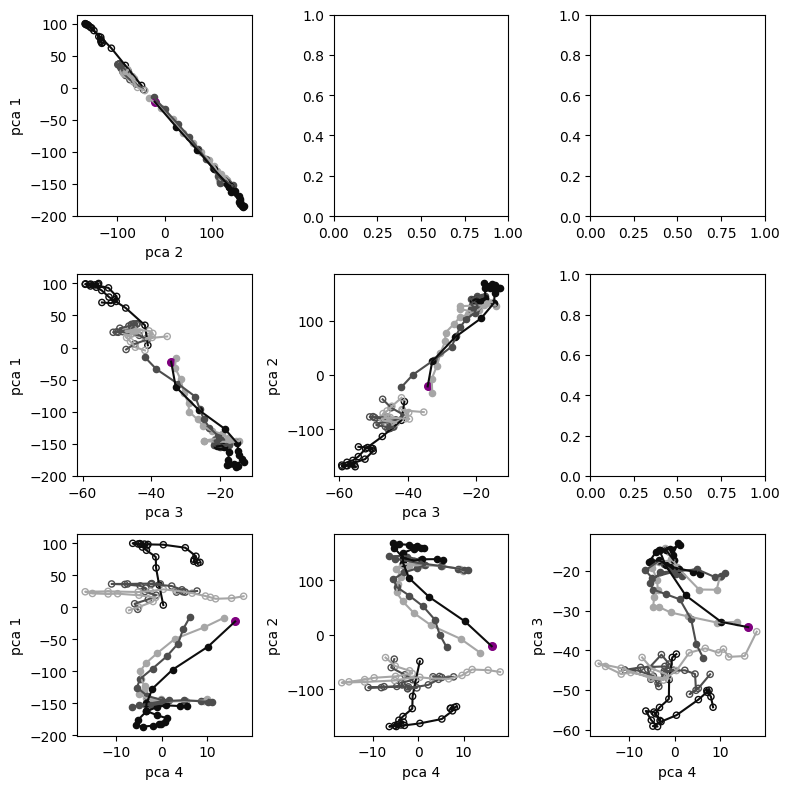

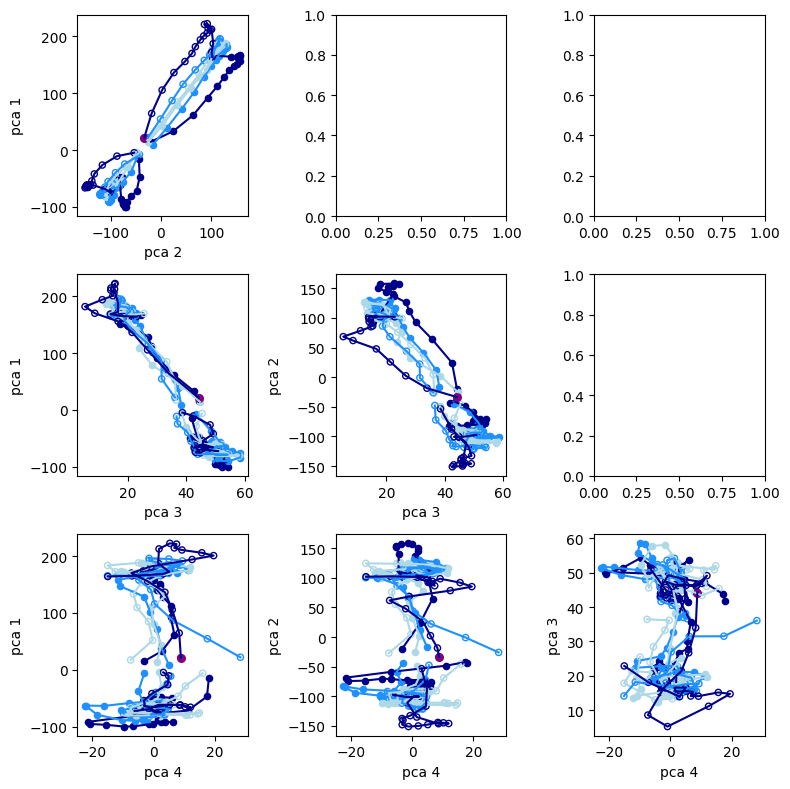

In [3]:
# Here you can select the context.

context = 'color'
#context = 'motion'

plot_projections_2d(model_a, 'pca', [], context)

### TDR

In [ ]:
# Here you can select the order of orthogonalization.

order_orthogonalization = ['choice', 'input_motion', 'input_color']
#order_orthogonalization = ['input_motion', 'choice', 'input_color']
#order_orthogonalization = ['input_motion',  'input_color', 'choice']


plot_projections_2d(model_a, 'tdr', order_orthogonalization)  
plot_projections_2d(model_b, 'tdr', order_orthogonalization)  
plot_projections_2d(model_c, 'tdr', order_orthogonalization)  
plot_projections_2d(model_d, 'tdr', order_orthogonalization)  
